# King County Project

## Business Problem

A client in King County, WA wants to advise homeowners on **home improvement projects** that will **add to the sale value of their homes**.

**This advice should be based on data from the most recent full calendar year, 2019**.

### Core questions:
Enclosing a porch will increase the sale price of a home.

Converting a garage to a bedroom is a good way to increase the sale price of a home.

Upgrading to a forced-air heating system will increase the sale price of a home.

### Core Goals:
Create model

Interpret results

Make recomendations

## Schedule

### Friday 2/19: 
#### Business Understanding & Preliminary EDA
* Repo Creation
* Data Importation
* Database Creation
* Created initial data frame.

### Saturday 2/20: 
#### Data Understanding & EDA
* Added ```.gitignore``` file in exploratory directory to exclude ```KingDB.db``` file.
* Created ```lookup()``` function.
* Created 2019 data frame.
* Created ```nz19``` data frame of 2019 documents with non-zero sale prices.

### Sunday 2/21: 
##### Data Prep

* Added a ```function.py``` module to contain the functions written while working through the project.
* Created a ```col_stripper()``` function, and appended it, ```fetch()```, and ```lookup()``` to the ```function``` module.
* Did some data cleaning on the lookup dataframe ```df_look```.
* Made a ```heat_df``` data frame with the ```'SalePrice'``` target and ```'HeatSystems'``` predictor.
* Converted  ```'HeatSystems'``` to a column called ```'HeatNames'```with more descriptive values.
* Perfomed one-hot encoding on ```'HeatNames'``` and created a ```model_df```.
* Created a correlation matrix and heatmap for ```model_df```.


# Initial EDA Work

#### Importing Libraries and Adjusting Settings

In [2]:
# import modules for eda and plotting
import pandas as pd
import numpy as np
import scipy.stats as stats

import sqlite3

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import functions as fn

# setting plots to inline
%matplotlib inline

# setting the max number of rows displayed
pd.options.display.max_rows = 200

## Pandas Dataframe

#### Importing the Data & Creating Initial Data Frames

Importing data and creating various data frames. Checking ```.shape```, nulls, and looking for problematic columns I may need to deal with later.

In [3]:
# creating paths to the files
files = ['EXTR_RPSale.csv', 'EXTR_ResBldg.csv', 'EXTR_Parcel.csv', 'EXTR_LookUp.csv']
paths = [f'../../data/raw/{file}' for file in files]

# creating list of data frames, importing data as strings
dfs = [pd.read_csv(path, dtype=str) for path in paths]

# isolating individual data frames
df_sale = dfs[0]
df_resb = dfs[1]
df_parc = dfs[2]
look = dfs[3]

In [4]:
# checking shape of the dataframes
df_sale.shape, df_resb.shape, df_parc.shape, look.shape

((351067, 24), (181510, 50), (205199, 82), (1208, 3))

#### Checking NaNs

In [5]:
# checking columns and nulls
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  object
 1   Major               351067 non-null  object
 2   Minor               351067 non-null  object
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  object
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  object
 15  PrincipalUse        351067 non-null  object
 16  Sa

In [6]:
# checking columns and nulls
df_resb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Major               181510 non-null  object
 1   Minor               181510 non-null  object
 2   BldgNbr             181510 non-null  object
 3   NbrLivingUnits      181510 non-null  object
 4   Address             181510 non-null  object
 5   BuildingNumber      181510 non-null  object
 6   Fraction            181510 non-null  object
 7   DirectionPrefix     181146 non-null  object
 8   StreetName          181510 non-null  object
 9   StreetType          181510 non-null  object
 10  DirectionSuffix     181146 non-null  object
 11  ZipCode             154594 non-null  object
 12  Stories             181510 non-null  object
 13  BldgGrade           181510 non-null  object
 14  BldgGradeVar        181510 non-null  object
 15  SqFt1stFloor        181510 non-null  object
 16  Sq

In [7]:
# checking columns and nulls
df_parc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205199 entries, 0 to 205198
Data columns (total 82 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              205199 non-null  object
 1   Major                   205199 non-null  object
 2   Minor                   205199 non-null  object
 3   PropName                196088 non-null  object
 4   PlatName                176654 non-null  object
 5   PlatLot                 205199 non-null  object
 6   PlatBlock               205199 non-null  object
 7   Range                   205199 non-null  object
 8   Township                205199 non-null  object
 9   Section                 205199 non-null  object
 10  QuarterSection          205199 non-null  object
 11  PropType                205199 non-null  object
 12  Area                    205193 non-null  object
 13  SubArea                 205193 non-null  object
 14  SpecArea                4864 non-nul

#### Checking Problematic Columns

Checking columns and dropping an extraneous column form the data frame.

In [8]:
# checking problematic columns
df_prob = df_parc[['Unnamed: 0', 'PropName', 'PlatName', 'Area', 'SubArea', 'SpecArea', 'SpecSubArea' ]]
df_prob.head(2)

,Unnamed: 0,PropName,PlatName,Area,SubArea,SpecArea,SpecSubArea
0,0,,SUMMER RIDGE DIV NO. 02,35,2,NaN,NaN
1,2,,SANDER'S TO GILMAN PK & SALMON BAY,19,1,NaN,NaN


In [9]:
#  dropping extraneaous column
df_parc = df_parc.drop('Unnamed: 0', axis=1)

In [10]:
# checking dropped column
df_parc.head(1)

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,807841,0410,,SUMMER RIDGE DIV NO. 02,41,,6,25,22,SW,...,N,N,N,N,N,N,N,N,N,N


#### Checking the Lookup Data Frame

Getting basic info, checking the first row, description strings, and cleaning the columns.

In [11]:
# getting info for lookup data frame
look.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LUType         1208 non-null   object
 1   LUItem         1208 non-null   object
 2   LUDescription  1208 non-null   object
dtypes: object(3)
memory usage: 28.4+ KB


In [12]:
# checking first row
look.head(1)

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...


In [13]:
# checking strings
look.LUType.values[:2], look.LUItem.values[:2], look.LUDescription.values[:2]

(array(['1  ', '1  '], dtype=object),
 array(['1  ', '10 '], dtype=object),
 array(['LAND ONLY                                         ',
        'Land with new building                            '], dtype=object))

Cleaning strings and checking results.

In [14]:
# cleaning strings
look['LUType'] = fn.col_stripper(look, 'LUType')
look['LUItem'] = fn.col_stripper(look, 'LUItem')
look['LUDescription'] = fn.col_stripper(look, 'LUDescription')

In [15]:
# checking results
print(look.LUType.values)
print(look.LUItem.values)
look.LUDescription.values

['1' '1' '1' ... '99' '99' '99']
['1' '10' '11' ... '3' '4' '5']


array(['LAND ONLY', 'Land with new building',
       'Household, single family units', ..., 'AVERAGE', 'ABOVE AVERAGE',
       'EXCELLENT'], dtype=object)

### Creating Main Data Frame
Merged three of the initial data frames into a main data frame and checked ```.info``` and ```.head()```.

In [16]:
# doing a chained merge of the three data frames on the 'Major' and 'Minor' columns
df = pd.merge(pd.merge(df_sale, df_parc, on=['Major', 'Minor']), df_resb, on=['Major', 'Minor'])

In [17]:
# checking info and first few columns
print(df.info())
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251300 entries, 0 to 251299
Columns: 151 entries, ExciseTaxNbr to AddnlCost
dtypes: object(151)
memory usage: 291.4+ MB
None


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0
1,2743356,638580,0110,07/14/2015,0,20150715002687,,,,,...,1,0,1,1963,0,0,0,0,3,0


In [18]:
df.describe()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
count,251300,251300,251300,251300,251300,251300,251300,251300,251300,251300,...,251300,251300,251300,251300,251300,251300,251300,251300,251300,251300
unique,243287,11239,5720,1979,21803,225202,1,1,1,1,...,6,4,6,122,91,86,68,24,5,356
top,3014061,276760,0020,09/25/2015,0,,,,,,...,0,0,0,2018,0,0,0,0,3,0
freq,62,1236,4317,340,77664,18638,251300,251300,251300,251300,...,183368,235002,208740,7615,238810,248710,249294,251161,162082,223304


In [19]:
columns = list(df.columns)
columns = [columns[4]] + columns[:3] + columns[4:]
df = df[columns]

In [20]:
df.head(3)

,SalePrice,ExciseTaxNbr,Major,Minor,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,190000,2743355,638580,0110,190000,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0
1,0,2743356,638580,0110,0,20150715002687,,,,,...,1,0,1,1963,0,0,0,0,3,0
2,338000,2772937,638580,0110,338000,20151222002066,,,,,...,1,0,1,1963,0,0,0,0,3,0


In [21]:
list(df.columns)

['SalePrice',
 'ExciseTaxNbr',
 'Major',
 'Minor',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot_x',
 'PlatBlock_x',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'PropName',
 'PlatName',
 'PlatLot_y',
 'PlatBlock_y',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootag

In [22]:
fn.lookup(look, 1).head()

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY
1,1,10,Land with new building
2,1,11,"Household, single family units"
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ units)"


In [77]:
fn.lookup(look, 2)

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [ ]:
look

## 2019 Data

Since we want to train our model on 2019 data, we are going to isolate the 2019 information into a new data frame and use it to define our target and predictors.

#### Light Data Cleaning

Changing datestrings to datetime objects,  and sale price strings to floats in the main pandas dataframe. Adding a 'DocumentYear' column to main the data frame.

In [23]:
# changing date strings to datetime objects
df.DocumentDate = pd.to_datetime(df.DocumentDate)

# adding a document year column
df['DocumentYear'] = df['DocumentDate'].apply(lambda x: x.year)

# converting SalePrice string to float
df['SalePrice'] = df['SalePrice'].astype('float')

#### Creating Initial 2019 DataFrame

Creating data frame and checking basic information

In [24]:
# isolating 2019 data
df19 = df[df['DocumentYear']==2019]

In [25]:
# checking data frame shape and looking for NaNs
print(df19.shape)
df19.isna().sum()

(43838, 152)


ExciseTaxNbr                  0
Major                         0
Minor                         0
DocumentDate                  0
SalePrice                     0
RecordingNbr                  0
Volume                        0
Page                          0
PlatNbr                       0
PlatType                      0
PlatLot_x                     0
PlatBlock_x                   0
SellerName                    0
BuyerName                     0
PropertyType                  0
PrincipalUse                  0
SaleInstrument                0
AFForestLand                  0
AFCurrentUseLand              0
AFNonProfitUse                0
AFHistoricProperty            0
SaleReason                    0
PropertyClass                 0
SaleWarning                   0
PropName                   2434
PlatName                   5151
PlatLot_y                     0
PlatBlock_y                   0
Range                         0
Township                      0
Section                       0
QuarterS

In [26]:
# checking first few rows
df19.head(3)

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,DocumentYear
4,3024468,894677,0240,2019-12-05,0.0,20191209000162,,,,,...,0,0,2016,0,0,0,0,3,0,2019
5,3024469,894677,0240,2019-12-05,0.0,20191209000163,,,,,...,0,0,2016,0,0,0,0,3,0,2019
11,3027422,213043,0120,2019-12-20,560000.0,20191226000848,,,,,...,0,0,1989,0,0,0,0,3,0,2019


#### Creating a 2019 Dataframe with Non-Zero Sale Prices 

Creating data frame and checking basic information

In [27]:
# creating a datafrme of 2019 data with non-zero sale prices and restting index
nz19 = df19[df19['SalePrice'] != 0].reset_index()

In [28]:
# checking shape and first few rows
print(nz19.shape)
nz19.head(3)

(29944, 153)


,index,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,DocumentYear
0,11,3027422,213043,0120,2019-12-20,560000.0,20191226000848,,,,...,0,0,1989,0,0,0,0,3,0,2019
1,12,3002257,940652,0630,2019-07-22,435000.0,20190730001339,,,,...,0,0,1994,0,0,0,0,3,2500,2019
2,22,2993601,140281,0020,2019-06-04,450000.0,20190614000489,,,,...,0,0,1986,0,0,0,0,3,0,2019


In [29]:
# checking for NaNs
df.isna().sum()

ExciseTaxNbr                   0
Major                          0
Minor                          0
DocumentDate                   0
SalePrice                      0
RecordingNbr                   0
Volume                         0
Page                           0
PlatNbr                        0
PlatType                       0
PlatLot_x                      0
PlatBlock_x                    0
SellerName                     0
BuyerName                      0
PropertyType                   0
PrincipalUse                   0
SaleInstrument                 0
AFForestLand                   0
AFCurrentUseLand               0
AFNonProfitUse                 0
AFHistoricProperty             0
SaleReason                     0
PropertyClass                  0
SaleWarning                    0
PropName                   11473
PlatName                   29223
PlatLot_y                      0
PlatBlock_y                    0
Range                          0
Township                       0
Section   

## Isolating Target and Initial Predictors

Since two of the questions we want to answer relate to the HeatSystem and SqFtEnclosedPorch features, we are going to isolate them, and our SalePrice target variable, into seperate dataframes. 

### HeatSystem Dataframe

Isolating ```'SalePrice'``` target and ```'HeatSystem'``` predictor in Checking first the few rows, shape, nulls, and unique values.

In [30]:
# Isolating SalePrice target and HeatSystem predictor into a data frame. 
heat_df = nz19[['SalePrice','HeatSystem']]
heat_df.head(3)

,SalePrice,HeatSystem
0,560000.0,5
1,435000.0,5
2,450000.0,1


In [31]:
# checking shape
heat_df.shape

(29944, 2)

In [32]:
# checking NaNs
heat_df.isna().sum()

SalePrice     0
HeatSystem    0
dtype: int64

In [33]:
# checking unique values
print(heat_df.HeatSystem.unique())
len(heat_df.HeatSystem.unique())

['5' '1' '4' '7' '6' '3' '8' '2' '0']


9

In [34]:
# looking up HeatSystem codes
lu_df = fn.lookup(df_look, 108)
lu_df

,LUType,LUItem,LUDescription
243,108,1,Floor-Wall
244,108,2,Gravity
245,108,3,Radiant
246,108,4,Elec BB
247,108,5,Forced Air
248,108,6,Hot Water
249,108,7,Heat Pump
250,108,8,Other


#### Checking ```'0'``` Values

Checking ```'0'```, since there is not a ```'0'``` lookup code. For now, will be assuming that there is no heating system information available for ```'0'``` enteries. May re-adjust assumption to 'no heating system in property' after researching further. 

In [35]:
# checking '0' values
zero_df = heat_df[heat_df['HeatSystem'] == '0']
print(zero_df.shape)
zero_df.head()

(122, 2)


,SalePrice,HeatSystem
538,305510.0,0
675,134000.0,0
771,650000.0,0
1072,449000.0,0
1073,705000.0,0


#### Prepping for Model Data Frame

Creating an array of the lookup code descriptions, and using it to make a list of values for use in a new column.  Will use this column in a one-hot-encoding procedure for more descriptive column names in the model dataframe.

In [36]:
column_names = lu_df.LUDescription.values
column_names

array(['Floor-Wall', 'Gravity', 'Radiant', 'Elec BB', 'Forced Air',
       'Hot Water', 'Heat Pump', 'Other'], dtype=object)

In [37]:
# putting descriptions into a list in preparation for adding a new column to the dataframe.
heat_names = []
for i in range(len(heat_df['HeatSystem'].values)):
    if heat_df['HeatSystem'].values[i] == '0':
        heat_names.append('NA')
    if heat_df['HeatSystem'].values[i] == '1':
        heat_names.append(column_names[0])
    if heat_df['HeatSystem'].values[i] == '2':
        heat_names.append(column_names[1])
    if heat_df['HeatSystem'].values[i] == '3':
        heat_names.append(column_names[2])
    if heat_df['HeatSystem'].values[i] == '4':
        heat_names.append(column_names[3])
    if heat_df['HeatSystem'].values[i] == '5':
        heat_names.append(column_names[4])
    if heat_df['HeatSystem'].values[i] == '6':
        heat_names.append(column_names[5])
    if heat_df['HeatSystem'].values[i] == '7':
        heat_names.append(column_names[6])
    if heat_df['HeatSystem'].values[i] == '8':
        heat_names.append(column_names[7])

In [38]:
# checking first few entries in list
heat_names[:5]

['Forced Air', 'Forced Air', 'Floor-Wall', 'Forced Air', 'Forced Air']

### Creating New Data Frame

Creating new data frame, dropping old ```'HeatSystems'``` column, and appending a new ```'HeatNames'``` column with more descriptive system names.

In [39]:
# creating new data frame and dropping old 'HeatSystems' column
heat_df2 = heat_df.copy().drop('HeatSystem', axis=1)

In [40]:
# appending new, more descriptive heat systems column, 'HeatNames'
heat_df2['HeatNames'] = heat_names

In [41]:
# checking first few rows
heat_df2.head(3)

,SalePrice,HeatNames
0,560000.0,Forced Air
1,435000.0,Forced Air
2,450000.0,Floor-Wall


#### One-Hot Encoding the HeatSystem Predictor

Instantiating the encoder, fitting the encoder to ```heat_df2[['HeatNames']]``` , and transforming the data. Creating a new ```heat_ohe``` data frame, dropping the ```'HeatNames'``` column from ``` heat_df2```, and concatenating it will ```heat_ohe``` to form a new ```model_df``` data frame.

In [42]:
# instantiating, fitting and transforming
ohcoder = OneHotEncoder(drop='first')

ohcoder.fit(heat_df2[['HeatNames']])

transformed = ohcoder.transform(heat_df2[['HeatNames']])

In [43]:
# creating heat_ohe data frame and checking the first few columns
heat_ohe = pd.DataFrame(transformed.todense(),\
                       columns = ohcoder.get_feature_names())
heat_ohe.head(3)

,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# dropping the 'HeatNames' column from heat_df2
heat2_dropped = heat_df2.drop('HeatNames', axis=1)

#### Creating ```model_df``` Data Frame

In [45]:
# creating the model dataframe and checking first few rows
model_df = pd.concat([heat2_dropped, heat_ohe], axis=1)
model_df.head(3)

,SalePrice,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
0,560000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,435000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,450000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ```model_df``` Correlation Matrix and Heatmap

In [46]:
model_df.corr()

,SalePrice,x0_Floor-Wall,x0_Forced Air,x0_Gravity,x0_Heat Pump,x0_Hot Water,x0_NA,x0_Other,x0_Radiant
SalePrice,1.000000,-0.013960,-0.058108,-0.001774,0.023708,0.036436,-0.022709,-0.001550,0.006037
x0_Floor-Wall,-0.013960,1.000000,-0.326640,-0.007937,-0.062461,-0.029477,-0.011944,-0.004580,-0.021424
x0_Forced Air,-0.058108,-0.326640,1.000000,-0.074348,-0.585072,-0.276116,-0.111879,-0.042899,-0.200676
x0_Gravity,-0.001774,-0.007937,-0.074348,1.000000,-0.014217,-0.006709,-0.002719,-0.001042,-0.004876
x0_Heat Pump,0.023708,-0.062461,-0.585072,-0.014217,1.000000,-0.052799,-0.021394,-0.008203,-0.038374
x0_Hot Water,0.036436,-0.029477,-0.276116,-0.006709,-0.052799,1.000000,-0.010096,-0.003871,-0.018110
x0_NA,-0.022709,-0.011944,-0.111879,-0.002719,-0.021394,-0.010096,1.000000,-0.001569,-0.007338
x0_Other,-0.001550,-0.004580,-0.042899,-0.001042,-0.008203,-0.003871,-0.001569,1.000000,-0.002814
x0_Radiant,0.006037,-0.021424,-0.200676,-0.004876,-0.038374,-0.018110,-0.007338,-0.002814,1.000000


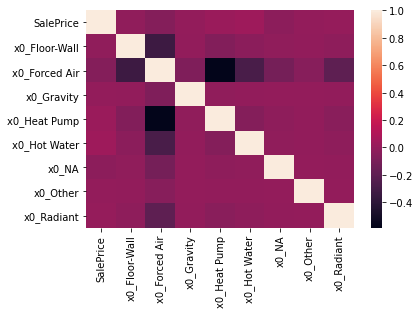

In [47]:
sns.heatmap(model_df.corr());

#### EnclosedPoarch Dataframe

In [48]:
# isolating SalePrice target and SqFtEnclosedPorch predictor
porch_df = nz19[['SqFtEnclosedPorch']]
porch_df.head()

,SqFtEnclosedPorch
0,0
1,0
2,0
3,0
4,0


## SQL Dataframe

### SQL Prelim Work

#### Created Database
Earlier, wrote up a [DB Creator](DB_Creator.ipynb) notebook and ran it to create a SQL database from the raw ```.csv``` files.

#### Creating DataFrame From the Database

Connecting to the database, and creating a cursor object. Joining the database tables into a second main data frame. Lastly, checking basic information about the data frame.

In [95]:
# creating database, connection, and cursor
conn = sqlite3.connect('KingDB.db')  
cur = conn.cursor()

In [96]:
# checking the table names
q = """SELECT name FROM sqlite_master 
WHERE type IN ('table','view') 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1"""
fn.fetch(cur, q)

[('PARC',), ('RESB',), ('SALES',)]

#### Joining The Tables to Create a Data Frame

In [105]:
# joining tables to create dataframe and appending column names
q = """SELECT*FROM SALES AS SA
       JOIN PARC AS PA
       ON SA.Major = PA.Major
       AND SA.Minor = PA.Minor
       JOIN RESB AS RE
       ON PA.Major = RE.Major
       AND PA.Minor = RE.Minor
       """
df2 = pd.DataFrame(fn.fetch(cur, q))
df2.columns = [i[0] for i in cur.description]

In [106]:
# checking info, shape and first row
print(df2.info())
df2.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251300 entries, 0 to 251299
Columns: 156 entries, ExciseTaxNbr to AddnlCost
dtypes: object(156)
memory usage: 299.1+ MB
None


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,1,0,1,1963,0,0,0,0,3,0


In [107]:
# dropping unnamed column found in initial pandas df above
df2 = df2.drop('Unnamed: 0', axis=1)

In [108]:
# checking shape and nulls
print(df2.shape)
df2.isna().sum()

(251300, 155)


ExciseTaxNbr                   0
Major                          0
Minor                          0
DocumentDate                   0
SalePrice                      0
RecordingNbr                   0
Volume                         0
Page                           0
PlatNbr                        0
PlatType                       0
PlatLot                        0
PlatBlock                      0
SellerName                     0
BuyerName                      0
PropertyType                   0
PrincipalUse                   0
SaleInstrument                 0
AFForestLand                   0
AFCurrentUseLand               0
AFNonProfitUse                 0
AFHistoricProperty             0
SaleReason                     0
PropertyClass                  0
SaleWarning                    0
Major                          0
Minor                          0
PropName                   11473
PlatName                   29223
PlatLot                        0
PlatBlock                      0
Range     

In [109]:
list(df2.columns)

['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot',
 'PlatBlock',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'Major',
 'Minor',
 'PropName',
 'PlatName',
 'PlatLot',
 'PlatBlock',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation

In [110]:
df2.loc[:, df2.columns.duplicated()]

,Major,Minor,PlatLot,PlatBlock,Major,Minor
0,638580,0110,11,,638580,0110
1,894677,0240,24,,894677,0240
2,408330,4150,9,42,408330,4150
3,510140,4256,6 AC 3,56,510140,4256
4,126320,0110,22,1,126320,0110
...,...,...,...,...,...,...
251295,219331,0270,27,,219331,0270
251296,886030,0550,55,,886030,0550
251297,769791,0030,3,,769791,0030
251298,924600,0650,65,,924600,0650


In [102]:
sqldf = df2.loc[:,~df2.columns.duplicated()]

In [103]:
sqldf.shape

(251300, 149)

In [104]:
list(sqldf.columns)

['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot',
 'PlatBlock',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'PropName',
 'PlatName',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'Area',
 'SubArea',
 'SpecArea',
 'SpecSubArea',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQual